In [1]:
import earthaccess
import pathlib
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.colors import LogNorm
import cmocean
import os

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
tspan = ("2024-04-10", "2025-03-10")

results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_CHL",
    temporal=tspan,
    granule_name="*.MO.*.4km.*",
)

paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/12 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/12 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/12 [00:00<?, ?it/s]

In [4]:
datasets = []
for i, path in enumerate(paths):
    try:
        ds = xr.open_dataset(path)
        # Add a time coordinate if it doesn't exist
        ds = ds.expand_dims('time')
        ds['time'] = [i]  # Simple index-based time
        datasets.append(ds)
        print(f"File {i}: {list(ds.variables)}")
    except Exception as e:
        print(f"Error opening file {i}: {e}")


File 0: ['chlor_a', 'lat', 'lon', 'palette', 'time']
File 1: ['chlor_a', 'lat', 'lon', 'palette', 'time']
File 2: ['chlor_a', 'lat', 'lon', 'palette', 'time']
File 3: ['chlor_a', 'lat', 'lon', 'palette', 'time']
File 4: ['chlor_a', 'lat', 'lon', 'palette', 'time']
File 5: ['chlor_a', 'lat', 'lon', 'palette', 'time']
File 6: ['chlor_a', 'lat', 'lon', 'palette', 'time']
File 7: ['chlor_a', 'lat', 'lon', 'palette', 'time']
File 8: ['chlor_a', 'lat', 'lon', 'palette', 'time']
File 9: ['chlor_a', 'lat', 'lon', 'palette', 'time']
File 10: ['chlor_a', 'lat', 'lon', 'palette', 'time']
File 11: ['chlor_a', 'lat', 'lon', 'palette', 'time']


In [5]:
if datasets:
    dataset = xr.concat(datasets, dim='time')
    print("Dataset created successfully!")
    print("Variables:", list(dataset.variables))
    
    # Find the chlorophyll variable name
    chl_var = None
    for var in dataset.data_vars:
        if 'chl' in var.lower() or 'chlor' in var.lower():
            chl_var = var
            print(f"Found chlorophyll variable: {chl_var}")
            break
    
    if chl_var is None:
        print("Available variables:", list(dataset.data_vars))
        chl_var = input("Enter the chlorophyll variable name: ")

Dataset created successfully!
Variables: ['chlor_a', 'palette', 'lat', 'lon', 'time']
Found chlorophyll variable: chlor_a


In [7]:
dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=0).values.shape

(142, 163)

In [10]:
save_directory = "Plots/PACE_CHL_Monthly"
os.makedirs(save_directory, exist_ok=True)

(array([9.906e+03, 6.436e+03, 1.798e+03, 1.803e+03, 1.889e+03, 1.027e+03,
        2.400e+02, 2.900e+01, 7.000e+00, 1.100e+01]),
 array([0.02198412, 0.03608575, 0.05018739, 0.06428903, 0.07839067,
        0.09249231, 0.10659394, 0.12069558, 0.13479722, 0.14889885,
        0.16300049]),
 <BarContainer object of 10 artists>)

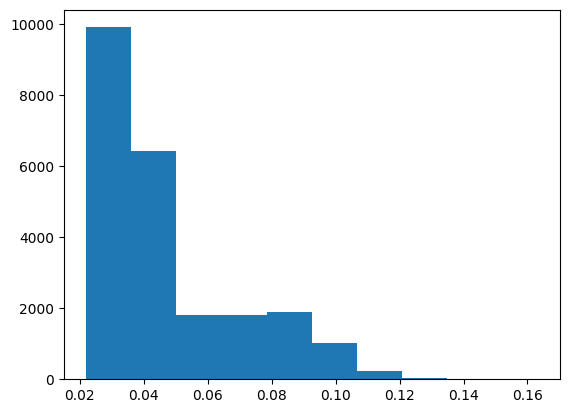

In [10]:
plt.hist(dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=11).values.flatten())
#plt.savefig(os.path.join(save_directory, 'DecemberCHL.png'), dpi=300)

In [11]:
# Extract data for each month using the time index
monthly_data = []
means = []
dates = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [16]:
data_jan = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=0)
flat_data_jan = data_jan.values.flatten()
mean_jan = np.nanmean(flat_data_jan)
mean_jan
data_feb = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=1)
flat_data_feb = data_feb.values.flatten()
mean_feb = np.nanmean(data_feb)
mean_feb
data_mar = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=0)
flat_data_mar = data_mar.values.flatten()
mean_mar = np.nanmean(flat_data_mar)
mean_mar
data_apr = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=0)
flat_data_apr = data_apr.values.flatten()
mean_apr = np.nanmean(flat_data_apr)
mean_apr
data_may = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=0)
flat_data_may = data_may.values.flatten()
mean_may = np.nanmean(flat_data_may)
mean_may
data_jun = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=0)
flat_data_jun = data_jun.values.flatten()
mean_jun = np.nanmean(flat_data_jun)
mean_jun
data_jul = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=6)
flat_data_jul = data_jul.values.flatten()
mean_jul = np.nanmean(flat_data_jul)
mean_jul
data_aug = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=7)
flat_data_aug = data_aug.values.flatten()
mean_aug = np.nanmean(flat_data_aug)
mean_aug
data_sep = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=8)
flat_data_sep = data_sep.values.flatten()
mean_sep = np.nanmean(flat_data_sep)
mean_sep
data_oct = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=9)
flat_data_oct = data_oct.values.flatten()
mean_oct = np.nanmean(flat_data_oct)
mean_oct
data_nov = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=10)
flat_data_nov = data_nov.values.flatten()
mean_nov = np.nanmean(flat_data_nov)
mean_nov
data_dec = dataset.sel(lat=slice(-11.6, -17.5), lon=slice(52.4, 59.2)).chlor_a.isel(time=11)
flat_data_dec = data_dec.values.flatten()
mean_dec = np.nanmean(flat_data_dec)
mean_dec

np.float32(0.047625225)

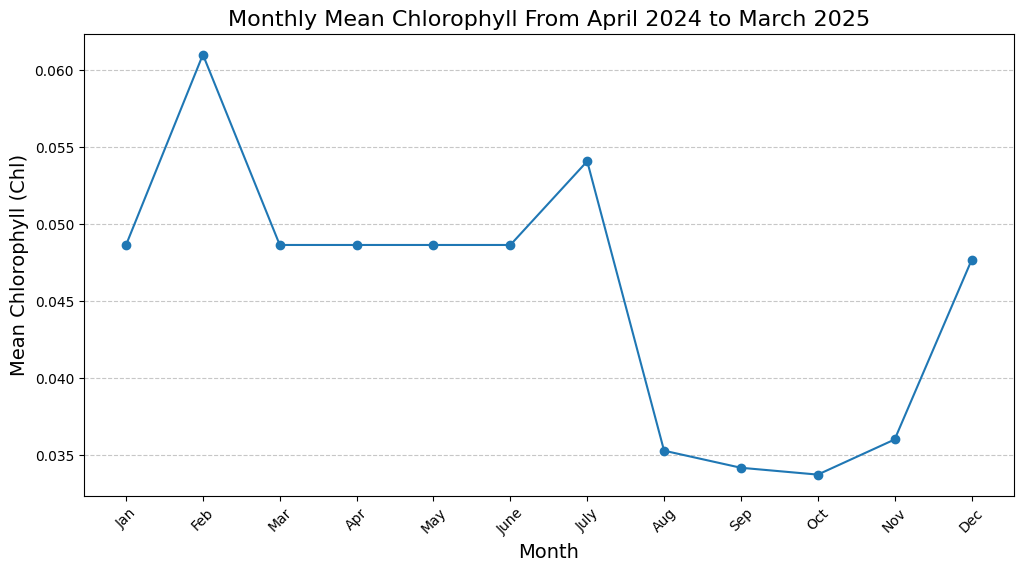

In [17]:
means = [mean_jan, mean_feb, mean_mar, mean_apr, mean_may, mean_jun, mean_jul, mean_aug, mean_sep, mean_oct, mean_nov, mean_dec]
dates = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(12, 6))
plt.plot(dates, means,"-o")
plt.title('Monthly Mean Chlorophyll From April 2024 to March 2025', fontsize=16)
plt.ylabel('Mean Chlorophyll (Chl)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.xticks(rotation=45)
plt.savefig(os.path.join(save_directory, 'MonthlyAverageCHL.png'), dpi=300)

Jan: 23146 valid points
Feb: 21844 valid points
Mar: 23146 valid points
Apr: 23146 valid points
May: 23146 valid points
June: 23146 valid points
July: 22396 valid points
Aug: 22713 valid points
Sep: 23101 valid points
Oct: 23112 valid points
Nov: 23078 valid points
Dec: 23146 valid points


/tmp/ipykernel_99/541853966.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(clean_monthly_data, labels=clean_dates, patch_artist=True,boxprops=dict(facecolor='lightgreen', color='darkgreen', linewidth=1.5), whiskerprops=dict(color='darkgreen', linewidth=1.5), capprops=dict(color='darkgreen', linewidth=1.5), medianprops=dict(color='darkred', linewidth=2), flierprops=dict(marker='o', markerfacecolor='red', markersize=4, markeredgecolor='darkred', alpha=0.6))


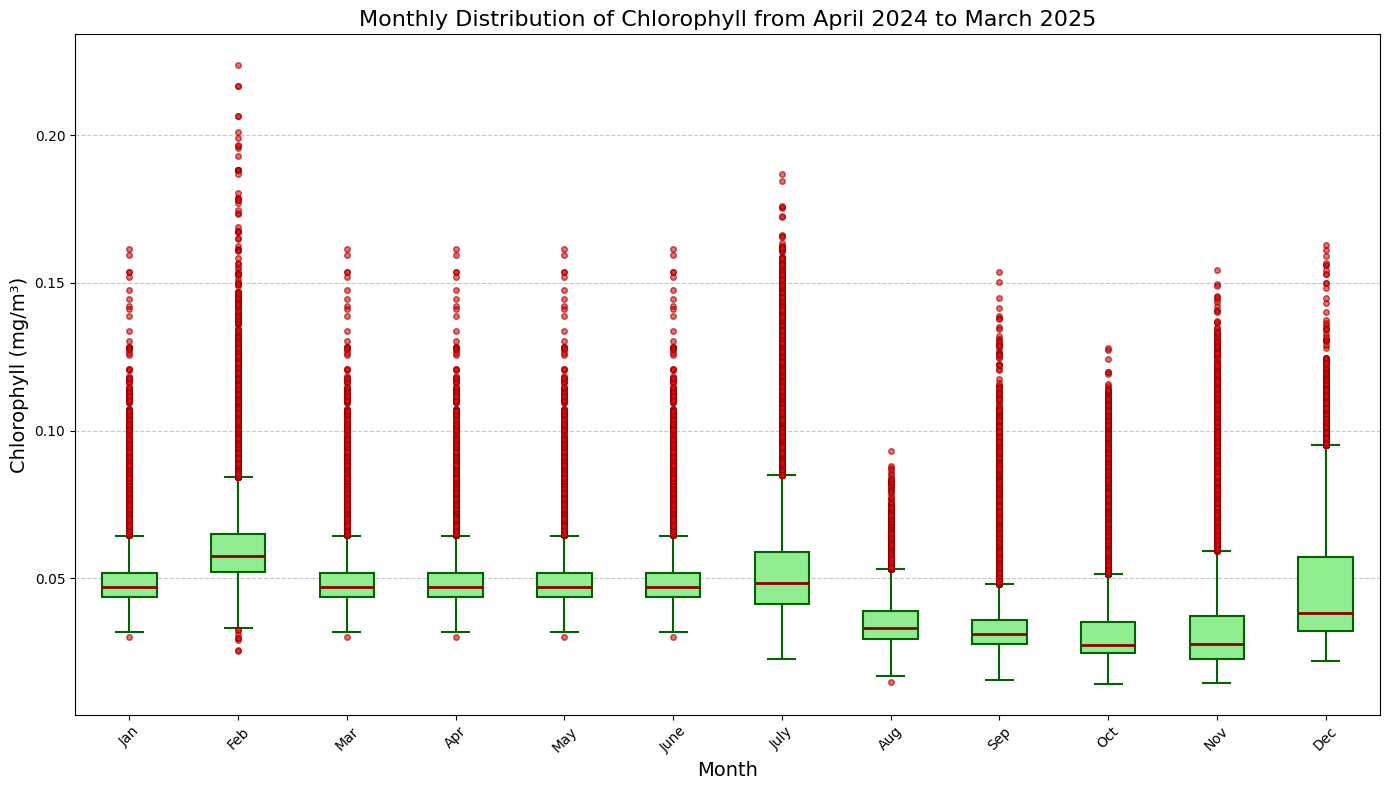

<Figure size 640x480 with 0 Axes>

In [19]:
monthly_raw_data = [flat_data_jan, flat_data_feb, flat_data_mar, flat_data_apr, flat_data_may, flat_data_jun, flat_data_jul, flat_data_aug, flat_data_sep, flat_data_oct, flat_data_nov, flat_data_dec]
dates = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

clean_monthly_data = []
clean_dates = []

for i, data in enumerate(monthly_raw_data):
    clean_data = data[~np.isnan(data)]
    if len(clean_data) > 0:
        clean_monthly_data.append(clean_data)
        clean_dates.append(dates[i])
        print(f"{dates[i]}: {len(clean_data)} valid points")

plt.figure(figsize=(14, 8))
box_plot = plt.boxplot(clean_monthly_data, labels=clean_dates, patch_artist=True,boxprops=dict(facecolor='lightgreen', color='darkgreen', linewidth=1.5), whiskerprops=dict(color='darkgreen', linewidth=1.5), capprops=dict(color='darkgreen', linewidth=1.5), medianprops=dict(color='darkred', linewidth=2), flierprops=dict(marker='o', markerfacecolor='red', markersize=4, markeredgecolor='darkred', alpha=0.6))

plt.title('Monthly Distribution of Chlorophyll from April 2024 to March 2025', fontsize=16)
plt.ylabel('Chlorophyll (mg/m³)', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.savefig(os.path.join(save_directory, 'MonthlyBox.png'), dpi=300)


In [43]:
tspan = ("2024-04-10", "2025-03-10")
bbox = (-76.75, 36.97, -75.74, 39.01)

results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_CHL",
    temporal=tspan,
    bounding_box=bbox,
)

paths = earthaccess.open(results)

QUEUEING TASKS | :   0%|          | 0/760 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/760 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/760 [00:00<?, ?it/s]

In [44]:
if len(paths) == 0:
    raise RuntimeError("No paths could be opened")

paths = earthaccess.open(results)
print(f"Opened {len(paths)} paths")

if len(paths) == 0:
    raise RuntimeError("No paths could be opened")

QUEUEING TASKS | :   0%|          | 0/760 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/760 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/760 [00:00<?, ?it/s]

Opened 760 paths


In [45]:
dataset = xr.open_dataset(paths[0])
print("Dataset opened successfully")
print(f"Available variables: {list(dataset.data_vars)}")

Dataset opened successfully
Available variables: ['chlor_a', 'palette']


In [46]:
print(f"Latitude range: {dataset.lat.min().values} to {dataset.lat.max().values}")
print(f"Longitude range: {dataset.lon.min().values} to {dataset.lon.max().values}")

Latitude range: -89.95000457763672 to 89.94999694824219
Longitude range: -179.9499969482422 to 179.95001220703125


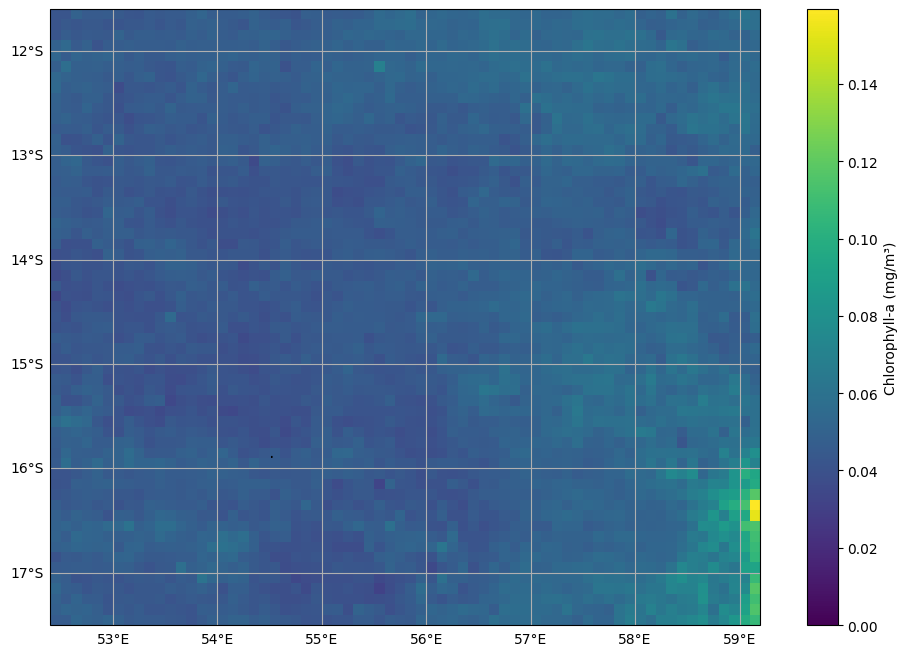

In [47]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
chl = dataset["chlor_a"].sel({
    "lat": slice(-11.6, -17.5),
    "lon": slice(52.4, 59.2)
})
plot = chl.plot(
    cmap="viridis", 
    vmin=0, 
    ax=ax,
    cbar_kwargs={'label': 'Chlorophyll-a (mg/m³)'}
)
plt.savefig(os.path.join(save_directory, 'SelectedLocation.png'), dpi=300)